# Plot roc results of different feature dimensions

In [1]:
import sys
import time
import getpass
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


In [3]:
print(time.asctime())

Thu Jun  6 13:46:42 2019


In [4]:
print(getpass.getuser())

lxu


In [9]:
def read_file(path):
    with open(path,'r') as file:
        validation_dict = json.load(file)
    return validation_dict

In [6]:
def plot(path_list,evaluation_method):
    dm_roc=[]
    ct_roc=[]
    dc_roc=[]
    sy_roc=[]
    for path in path_list:
        validation_dict=read_file(path)
        dm_roc.append(validation_dict['Disease Modifying']['ROC'])
        ct_roc.append(validation_dict['Clinical Trial']['ROC'])
        dc_roc.append(validation_dict['Drug Central']['ROC'])
        sy_roc.append(validation_dict['Syptomatic']['ROC'])
    # different feature dimensions
    x=['16','32','40','48','56','64']
    #Disease Modifying is training data
    plt.plot(x,dm_roc,color='blue',label='Disease Modifying(training data)')
    plt.plot(x,ct_roc,color='red',label='Clinical Trial')
    plt.plot(x,dc_roc,color='yellow',label='Drug Central')
    plt.plot(x,sy_roc,color='black',label='Syptomatic')
    # Himmelstein's roc, plot as same color with the same dataset.compare them with the best result-dimension 48
    plt.plot(['48'],[0.974],color='blue',marker="*")
    plt.plot(['48'],[0.7],color='red',marker="*")
    plt.plot(['48'],[0.855],color='yellow',marker="*")
    plt.plot(['48'],[0.702],color='black',marker="*")
    plt.xlabel('number of feature dimension')
    plt.ylabel('AUROC')
    plt.title(label='AUROC of different feature dimensions of node2vec')
    plt.legend()

In [7]:
plot(
    [
        '/home/lxu/Desktop/validation_d16.json',
        '/home/lxu/Desktop/validation_d32.json',
        '/home/lxu/Desktop/validation_d40.json',
        '/home/lxu/Desktop/validation_d48.json',
        '/home/lxu/Desktop/validation_d56.json',
        '/home/lxu/Desktop/validation_d64.json'
    ],
    'roc',
)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/lxu/Desktop/validation_d16.json'

# Make a matrix of all results

In [5]:
output_directory = '/home/lxu/Desktop/results'

df = pd.DataFrame(0.000,index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],columns =['walk_length','dimensions','number_walk','window size','p','q','Disease Modifying roc','Clinical Trial roc','Drug Central roc','Symptomatic roc'])

for i, filename in enumerate(os.listdir(output_directory), start=1):
    if 'node2vec_graph' not in filename:
        continue
    directory = os.path.join(output_directory,filename)
    metadata_path= os.path.join(directory,'config.json')
    validation_path = os.path.join(directory,'validation.json')
    df['p'][i]=1
    df['q'][i]=1
    with open(metadata_path, 'r') as file:
        metadata = json.load(file)
        df['walk_length'][i] = metadata['walk_length']
        df['number_walk'][i] = metadata['num_walks']
        df['dimensions'][i] = metadata['dimensions']
        df['window size'][i] = metadata['window']
    with open (validation_path, 'r') as file:
        validation = json.load(file)
        df['Disease Modifying roc'][i] = validation['Disease Modifying']['ROC']
        df['Clinical Trial roc'][i] = validation['Clinical Trial']['ROC']
        df['Drug Central roc'][i] = validation['Drug Central']['ROC']
        df['Symptomatic roc'][i] = validation['Symptomatic']['ROC']

print(df)   

    walk_length  dimensions  number_walk  window size    p    q  \
1          30.0        56.0         10.0         10.0  1.0  1.0   
2          50.0        48.0         10.0         10.0  1.0  1.0   
3          30.0        48.0         10.0          2.0  1.0  1.0   
4          30.0        48.0         10.0          4.0  1.0  1.0   
5          30.0        16.0         10.0         10.0  1.0  1.0   
6          30.0        32.0         10.0         10.0  1.0  1.0   
7          20.0        48.0         10.0         10.0  1.0  1.0   
8          30.0        40.0         10.0         10.0  1.0  1.0   
9          10.0        48.0         10.0         10.0  1.0  1.0   
10         80.0        48.0         10.0         10.0  1.0  1.0   
11         30.0        64.0         10.0         10.0  1.0  1.0   
12         30.0       159.0         10.0         10.0  1.0  1.0   
13         30.0        48.0         10.0         10.0  1.0  1.0   
14          0.0         0.0          0.0          0.0  0.0  0.

In [6]:
dff = pd.read_csv("all_results.tsv", sep='\t')
del dff[dff.columns[0]]
for column in 'walk_length', 'dimensions', 'number_walk', 'window_size':
    dff[column] = dff[column].map(int)
dff.sort_values('walk_length')
dff = dff.sort_values('walk_length')

dff.head()

,walk_length,dimensions,number_walk,window_size,p,q,Disease Modifying,Clinical Trial,Drug Central,Symptomatic
8,10,48,10,10,1.0,1.0,0.500000,0.500000,0.500000,0.500000
6,20,48,10,10,1.0,1.0,0.923265,0.736966,0.826057,0.754967
0,30,56,10,10,1.0,1.0,0.926117,0.696589,0.812160,0.859918
2,30,48,10,2,1.0,1.0,0.938511,0.702795,0.845893,0.872022
3,30,48,10,4,1.0,1.0,0.899846,0.744448,0.721881,0.807746


In [7]:
data = pd.melt(
    dff, 
    id_vars=dff.columns[:6],
    value_vars=dff.columns[6:],
    var_name='dataset',
    value_name='ROC',
)
data.head()

,walk_length,dimensions,number_walk,window_size,p,q,dataset,ROC
0,10,48,10,10,1.0,1.0,Disease Modifying,0.500000
1,20,48,10,10,1.0,1.0,Disease Modifying,0.923265
2,30,56,10,10,1.0,1.0,Disease Modifying,0.926117
3,30,48,10,2,1.0,1.0,Disease Modifying,0.938511
4,30,48,10,4,1.0,1.0,Disease Modifying,0.899846


In [ ]:
sns.pairplot(data[data.columns[:4]])
plt.show()

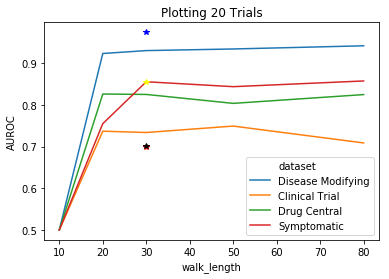

In [28]:
idx = (
    (data.dimensions == 48) 
    & (data.window_size == 10)
    & (data.number_walk == 10)
)

sns.lineplot(
    data=data[idx],
    x='walk_length',
    y='ROC',
    hue='dataset',
   
)

plt.plot([30],[0.974],color='blue',marker="*")
plt.plot([30],[0.7],color='red',marker="*")
plt.plot([30],[0.855],color='yellow',marker="*")
plt.plot([30],[0.702],color='black',marker="*")

plt.title(f'Plotting {idx.sum()} Trials')
plt.ylabel('AUROC')

plt.show()

In [ ]:
data[idx]

In [29]:
for dataset in data.dataset.unique():
    print(dataset, data.iloc[data[data.dataset == dataset]['ROC'].idxmax()], '\n')

Disease Modifying walk_length                   30
dimensions                   159
number_walk                   10
window_size                   10
p                              1
q                              1
dataset        Disease Modifying
ROC                     0.953629
Name: 9, dtype: object 

Clinical Trial walk_length                50
dimensions                 48
number_walk                10
window_size                10
p                           1
q                           1
dataset        Clinical Trial
ROC                  0.749218
Name: 24, dtype: object 

Drug Central walk_length              30
dimensions               48
number_walk              10
window_size               2
p                         1
q                         1
dataset        Drug Central
ROC                0.845893
Name: 29, dtype: object 

Symptomatic walk_length             30
dimensions              48
number_walk             10
window_size              2
p                        1
q 

In [25]:
def read_repeat (path):
    data =[]
    
   
    for i,name in enumerate(os.listdir(path), start=1):
        file_path = os.path.join(path,name)
        if 'config.json' in name:
            
            metadata = read_file(file_path)
            dimension = metadata['dimensions']
            num_walks = metadata['num_walks']
            repeat = metadata['repeat']
            window = metadata['window']
            p = metadata['p']
            q = metadata['q']
        elif os.path.isdir(file_path) == True:
            for i,name in enumerate(os.listdir(file_path),start=1):
                one_data = []
                if not 'validation' in name:
                    continue
                else:
                    validation_path = os.path.join(file_path,name)
                    validation_data = read_file(validation_path)
                    one_data.append(validation_data['Disease Modifying']['ROC'])
                    one_data.append(validation_data['Clinical Trial']['ROC'])
                    one_data.append(validation_data['Drug Central']['ROC'])
                    one_data.append(validation_data['Symptomatic']['ROC'])
                data.append(one_data)
    df = pd.DataFrame(data=data, columns = ['Disaese Modifying', 'Clinical Trial', 'Drug Central','Symptomatic'])
    #plot = sns.boxplot(x=df.columns,data=df)
    return df
nw10 = read_repeat('/home/lxu/Desktop/node2vec_graph_nw10')
p1q0_5 = read_repeat('/home/lxu/Desktop/node2vec_graph_p1q0_5')
p1q2 = read_repeat('/home/lxu/Desktop/node2vec_graph_p1q2')
nw10.to_csv('nw10_repeat')
p1q0_5.to_csv('p1q0_5_repeat')
p1q2.to_csv('p1q2_repeat')                    
                    

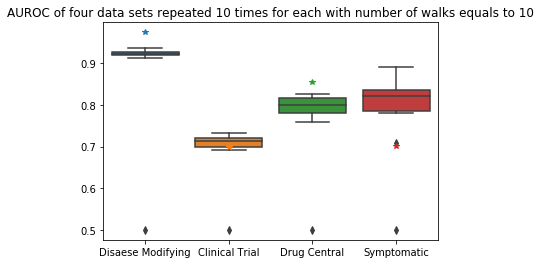

In [23]:
p1 = sns.boxplot(data=nw10)
p1.set_title('AUROC of four data sets repeated 10 times for each with number of walks equals to 10')
plt.plot(['Disease Modifying'],[0.974],marker="*")
plt.plot(['Clinical Trial'],[0.7],marker="*")
plt.plot(['Drug Central'],[0.855],marker="*")
plt.plot(['Symptomatic'],[0.702],marker="*")
# dimensions = 48
# walk length = 30
# window = 10
# p = 1
# q = 1
# num_walk = 10

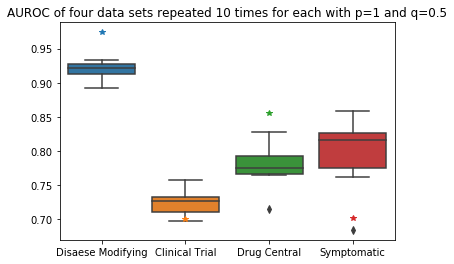

In [24]:
p1 = sns.boxplot(data=p1q0_5)
p1.set_title('AUROC of four data sets repeated 10 times for each with p=1 and q=0.5')
plt.plot(['Disease Modifying'],[0.974],marker="*")
plt.plot(['Clinical Trial'],[0.7],marker="*")
plt.plot(['Drug Central'],[0.855],marker="*")
plt.plot(['Symptomatic'],[0.702],marker="*")
# dimensions = 48
# walk length = 30
# window = 10
# p = 1
# q = 0.5
# num_walk = 10

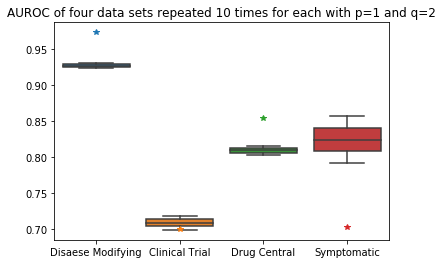

In [26]:
p1 = sns.boxplot(data=p1q2)
p1.set_title('AUROC of four data sets repeated 10 times for each with p=1 and q=2')
plt.plot(['Disease Modifying'],[0.974],marker="*")
plt.plot(['Clinical Trial'],[0.7],marker="*")
plt.plot(['Drug Central'],[0.855],marker="*")
plt.plot(['Symptomatic'],[0.702],marker="*")
# dimensions = 48
# walk length = 30
# window = 10
# p = 1
# q = 2
# num_walk = 10